# TTM4105 2024 Assignment 1

The purpose of this assignment is to enhance your understanding of the concepts introduced in the lectures via *experience based learning*. The assignment has two parts where Part 1 focuses on how audio is converted into a signal and Part 2 focuses on the main elements of transmitting this signal over a medium. 


Submission guidelines:<br>
You should export this notebook with solved tasks as a PDF. Your submission should then contain two items: <br>
a.) A zip archive of the complete folder named *TTM4105_Assignment1_GroupX*, <br>
b.) Exported PDF of the notebook *including the group number* in the file name. In case you need help with jupyter notebook and exporting your results, there is a file called *instructions_assignment1_TTM4105.pdf* on Blackboard.   
One delivery per group is sufficient.<br>

In [1]:
### NB! ###
# Run this box to import all nessecary libraries.
# Remember to fill in your own student number below before starting on your assignment.

%run -i 'scripts/assignment1-init.py'

# TODO: Fill in your student number here
seed = 123456789

# <a id='part1'>Part 1: Filtering, Sampling and Quantization [40 points]</a>
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# <a id='1.1-filtering'>1.1 Filtering </a>
| |
|---|
| <img src="figures/filtering.png" alt="Signal Filtering Techniques" width="600"/> |
|*Source: [Wikipedia](https://en.wikipedia.org/wiki/Filter_%28signal_processing%29)* |
<a id="filtering"><p style="text-align: center;"><b>Figure 1.1: Different signal filtering methods that can be used to remove unwanted frequencies from the signal.</b></p></a>

In sound and telecommunications, filtering is the process of selectively modifying the frequency content of a signal. This manipulation allows engineers to remove unwanted noise, isolate specific frequency bands, and enhance the overall quality of audio or data transmission.  Filtering techniques find applications in everything from noise reduction in headphones to ensuring clear conversations across vast cellular networks.

- **Importance of Filtering:**<br>
Filtering is essential in the age of Big Data to focus analysis, save storage space, and optimize processing power by targeting only relevant information.
<br>
- **Filtering in Telecommunications:**<br>
Filtering takes a central role in telecommunications for several reasons:
    - **Noise Reduction:** Filters remove unwanted background noise and interference, improving the efficiency and clarity of the data transmissions.
    - **Channel Separation:** In wireless communications, filters isolate specific frequency bands for different channels. This prevents signals from overlapping and causing interference.

## <a id='1.1.1-experimenting_filtering'>Experimenting with Filter Cutoff</a>

A cutoff frequency is where a filter starts reducing a signal, determining which frequencies pass and which are blocked. By adjusting the cutoff, you can hear how filters shape the audio. Start by plotting the frequency domain of the provided audio clip to see which frequencies are present and their amplitudes.

## <a id='1.1.2-Coding_Task'>Plot the Frequency Domain</a>
Listen to audio/run-forrest.wav. Below you will find a code block with some template code for creating a frequency domain for the provided audio clip, **your first task** will be to finish the code for the template code provided, or create your own function to plot the frequency domain of the audio clip.

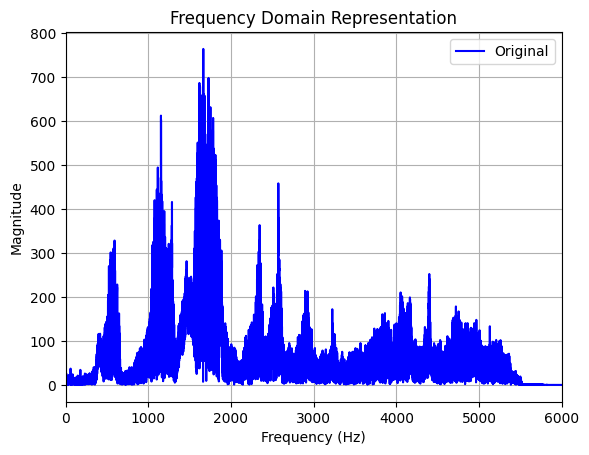

In [2]:
"""
Plots the frequency domain representation of an audio file.

Args:
    audio_file (str): Path to the audio file.
    sampling_rate (float, optional): Sampling rate to use. If not provided, try to extract it from the audio file.
"""

# Imports
import numpy as np
import matplotlib.pyplot as plt
import librosa 


def plot_frequency_domain_audio(audio_file, sampling_rate=None):

    # Load the audio file using librosa
    signal, sr = librosa.load(audio_file, sr=sampling_rate)

    # If the sampling rate wasn't provided, use the one from the audio file
    if sampling_rate is None:
        sampling_rate = sr

    # Compute the FFT, frequencies, and magnitude (same as before)
    fft_spectrum = np.fft.fft(signal)
    fft_length = len(fft_spectrum)
    frequencies = np.fft.fftfreq(fft_length, d=1 / sampling_rate)
    magnitude_spectrum = np.abs(fft_spectrum)[:fft_length // 2]
    positive_frequencies = frequencies[:fft_length // 2]

    # Plot the magnitude spectrum
    plt.figure()
    plt.plot(positive_frequencies, magnitude_spectrum, color='blue', label='Original')
    plt.xlim(0, 6000)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.title("Frequency Domain Representation")
    plt.grid(True)
    plt.legend()
    plt.show()

plot_frequency_domain_audio("audio/run-forrest.wav") 


Now that you have plotted the frequency domain for the audio signal, you can see the frequencies the audio clip consists of. This will be useful for the upcoming questions. Use the frequency domain aquired to answer the following questions.

## <a id='1.1.3-filtering_questions'>Filtering Questions [12 points]</a>

**Q1.1.1:** Think back to the birds chirping in the "Run Forrest Run" sound clip and remember the frequency plot you generated earlier. In which part of the frequency domain would you expect the birds chirping to be located in? <br>
*Answer:* We expect the bird chipping to be in the higher frequency range of the plot. Bird chipping are typically higher-pitched frequencies, so we would expect it to be in the range of roughy 2500Hz an above.

**Q1.1.2:** Based on **Figure 1.1**, which filter type would you use to isolate just the birdsong? <br>
*Answer:* To isolate the birdsong we would use a high-pass filter, to only focus on the high-pitch frequencies (where the birdsong is most likely to be in the frecuency spectrum).

**Q1.1.3:** What are the advantages of filtering? What happens if the signal is filtered too much or too little? Use the code provided below to filter the audio signal with a cutoff frequency of 3000Hz and 8000Hz. What can you observe? How does the signal sound with a lower/higher cutoff? <br>
*Note: It can be beneficial to also filter at higher/lower frequencies to aid yourself with answering this question.*<br>
*Answer:* The advantages of filtering is that you can isolate a range of frequencies which can help reduce unwanted noise or irrelevant frequencies. We can also isolate a specific parts of a signal, by eliminating the noises (other frequencies than our wanted frequency range) we do not want to be present, when analysing the signal. Another advantage is that we can restrict the bandwidth to avoid overlapping and interference with other signals.<br>
If you filter too much you will reduce the quality of the sound, and make the it sound muffled. You also risk losing important parts of the signal. For example in our case, if we filter too much we lose some of the bird chipping.<br>
If you filter too little the sound will still contain much of the unwanted noise, making it harder to isolate the audio we are actually interested in.<br>
When we cutoff at a lower frequency the sound got very muffled.<br>
When we cutoff at a high frequency, we didn't hear any difference from the original clip.

In [3]:
"""
Args:
    input_file (str): Path to the input WAV file.
    output_file (str): Path to the output filtered WAV file.
    cutoff (int, optional): Cutoff frequency (Hz). Defaults to 1000.
    numtaps (int, optional): Number of filter taps. Defaults to 201.
"""

# Args (You can use your own audio file if you wish)
input_file = 'audio/run-forrest.wav'
output_file = 'audio/run-forrest-filtered.wav'

# Apply Filter
apply_fir_filter(input_file, output_file, cutoff=2500)

# Import and Display Audio
sampling_rate, freq = sp.io.wavfile.read('audio/run-forrest-filtered.wav')
ipd.Audio(freq, rate=sampling_rate)

# <a id='1.2-sampling'>1.2 Sampling</a>
| |
|---|
| <img src="figures/signal_sampling.png" alt="Signal Sampling" width="600"/> |
|*Source: [Wikipedia](https://en.wikipedia.org/wiki/Sampling_%28signal_processing%29)* |
<a id="fig1"><p style="text-align: center;"><b>Figure 2.1: Signal sampling representation. The continuous signal S(t) is represented with a green colored line while the discrete samples are indicated by the blue vertical lines.</b></p></a>

The image shows signal sampling, where blue vertical lines represent discrete data points from a continuous signal. Sampling discretizes the signal along the x-axis, crucial for efficient processing in digital signal processing and telecommunications, enabling analog-to-digital conversion.</b>


## <a id='1.2.1-nyquist_sampling'>Nyquist–Shannon Sampling Theorem</a>

In an ideal scenario, we would sample a signal at an infinitely small time interval, but this is impractical due to excessive storage and computational demands. The key question is: what is the minimum sampling frequency to ensure accurate signal reconstruction and avoid aliasing?

The Nyquist–Shannon sampling theorem addresses this, stating that the sample rate must be at least twice the signal’s bandwidth to avoid aliasing (covered in Section 1.2.2). For example, sound is often sampled at 44.1 kHz (0.023 milliseconds per sample). Excessive sampling is inefficient as it increases storage and computational load without adding useful information.

For hardware with a maximum sampling rate of 6,000 Hz, only signals up to 3,000 Hz can be accurately captured, requiring at least two samples per period. This is the Nyquist rate or Nyquist limit, which is $ \frac{1}{2} $ the sampling rate $f_s$.</p>

## <a id='1.2.2-aliasing'>Aliasing</a>

<p style='text-align: justify;'>
When a signal with frequency components above the Nyquist limit is sampled, aliasing occurs, causing higher frequencies to appear as lower frequencies due to insufficient sampling. This is shown in the figure below.
<p/>

| |
|---|
| <img src="figures/aliasing.jpg" alt="Aliasing" width="600"/> |
|*Source: [ni.com docs](https://www.ni.com/docs/en-US/bundle/labwindows-cvi/page/advancedanalysisconcepts/aliasing.html)* |
<a id="fig2"><p style="text-align: center;"><b>Figure 2.2: Adequate sampling can be seen in the first graph, and aliasing due to sampling frequency lower than required by Nyquist theorem can be seen in the second graph.</b></p></a>

## <a id='1.2.2-aliasing'>1.2 Experimenting with Aliasing (plotting) [4 points]</a>

In this section you will directly observe the effects of aliasing and understand why the Nyquist limit is so important in digital signal processing.

**Use the code block below to try the following experiments:**
- Sample different frequencies below the Nyquist limit
- Sample different frequencies at or above the Nyquist limit
- Adjust the phase shift <br>

*Note: Make sure to document results and findings in the final delivery.* <br>
*Note: The code might result in OptimizeWarning but that does not change the outcome and can be safely ignored.*

*Observations*:

Sampling rate: 20 Hz


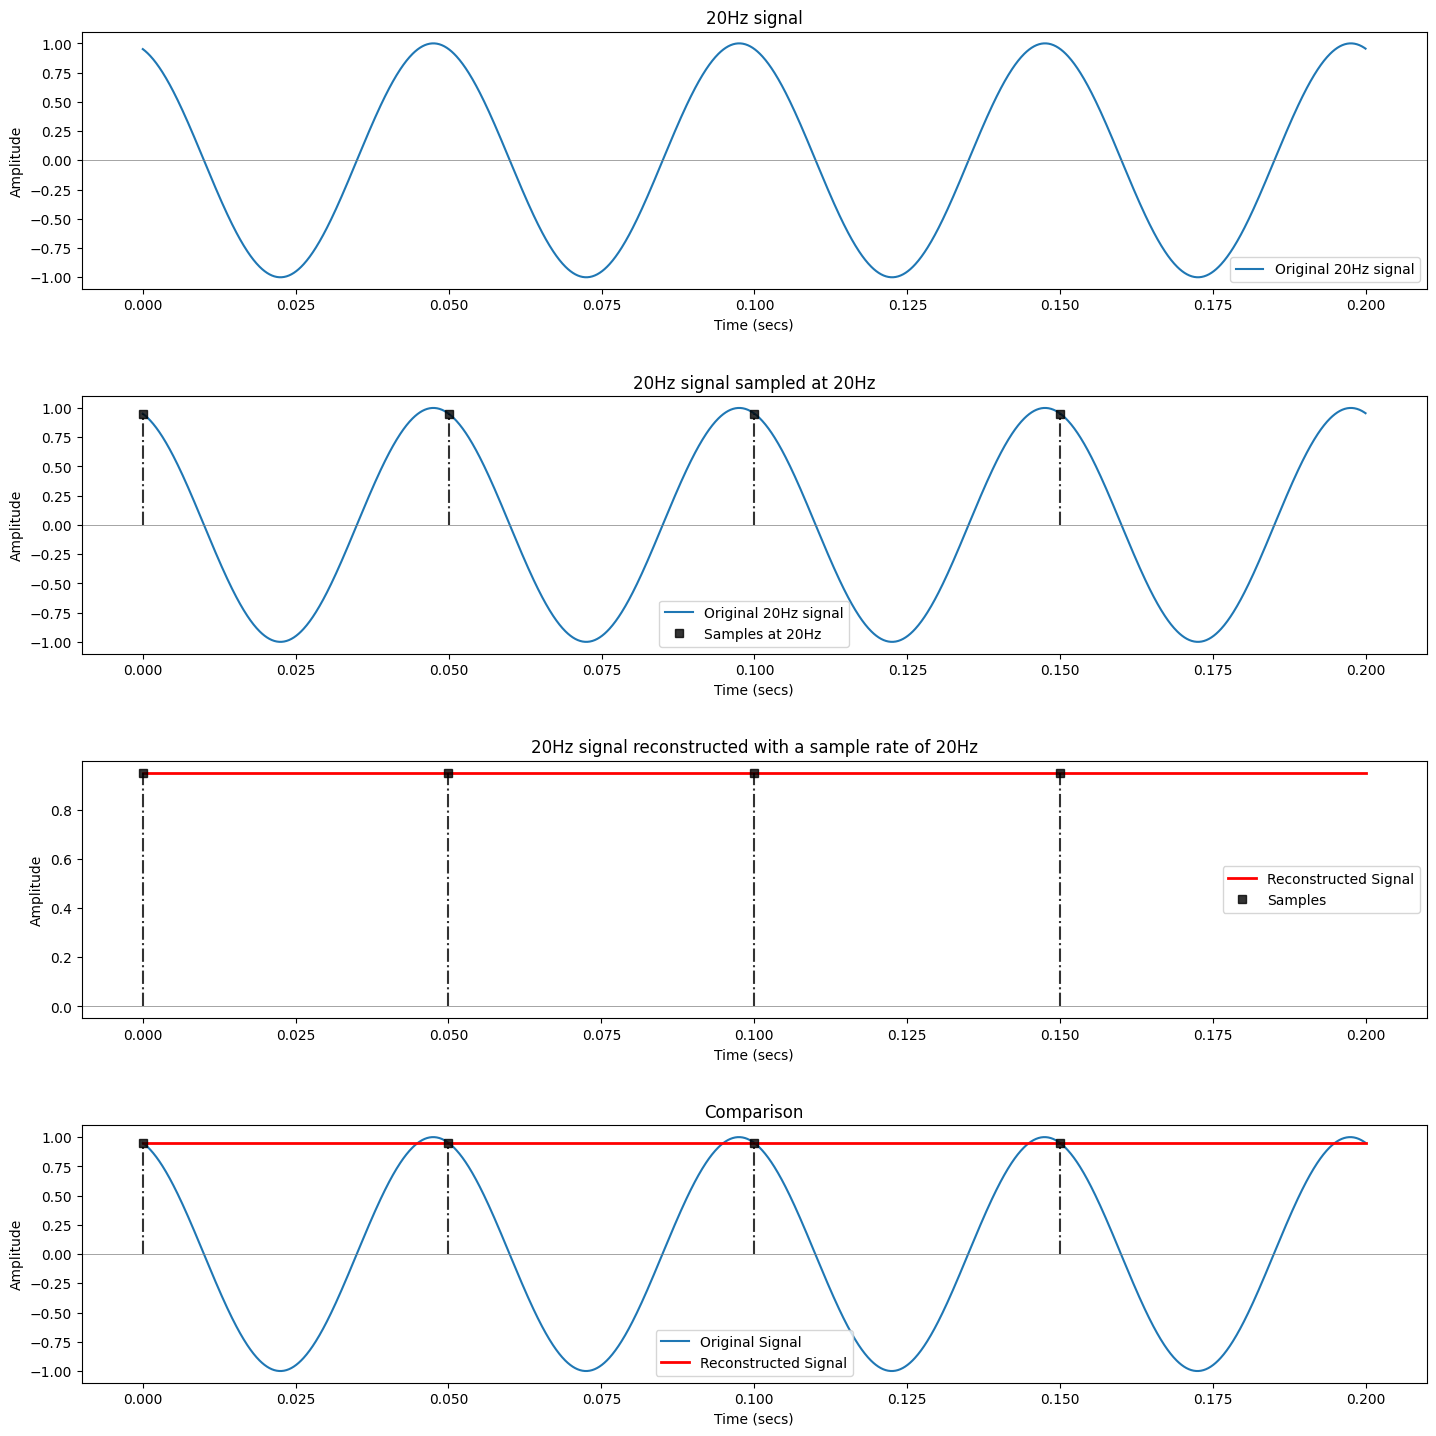

In [18]:
"""
Args:
    frequency (int): Initial frequency (Hz).
    sample_rate (int): The sample rate to sample the inital frequency at (Hz).
    shift_wave (int): Amount of phase shift to add to the initial wave (How many samples to shift the wave to the left).
"""

sample_frequency(frequency=20, sample_rate=20, shift_wave=150)

## <a id='1.2.4-aliasing_questions'> Aliasing Questions [8 points]</a>

**Q1.2.1:** Starting with a frequency of 20Hz, how does the reconstructed signal behave as the sample rate approaches the Nyquist limit? When does aliasing occur, and can you provide an example of an aliased frequency that occurs when the sample rate is lower than 40Hz? <br>
*Answer*: The signal should be possible to reconstruct while the sample rate approaches the Nyquist limit.<br>
If this is not the case and the sample rate falls below 40 Hz (below the Nyquist limit), aliasing will occur, and we will not be able to reconstruct the original signal in an appropriate way.<br>
Example: If we sample at 30Hz (below Nyquist), the reconstructed signal will appear to have a lower frequency than the original singal at 20Hz. And will appear as a 10 Hz because of aliasing. $$f_{alias} = |f_{signal} - f|$$ <br>

**Q1.2.2:** Why is it that sampling at exactly the Nyquist limit is sometimes insufficient, and what information about the signal would be necessary to properly reconstruct it? <br>
*Answer:* This can be insufficient due to noise or other signals close to the Nyquist frequency. In addition, phase information is important when reconstructing a singal, therefore when sampling exactly at the Nyquist rate, the samples might miss important characteristics of the signal, like the shape of the wave. Especially, if there is a phase shift in the signal. This can possibly lead to an incorrect output of the amplitude or timing of a signal. <br>

A solution to this is to oversample or apply anti-aliasing filters to remove high-frequency components. When oversampling, it allows us to get a more accurate reconstruction of the original signal and avoid missing critical details of the waveform and such.

## <a id='1.2.5-aliasing'> Aliasing: Sound Data </a>
In this task, we will will look at how sampling works in *practice* by the use of an audio file. We will use an audio file that *sweeps* through the range of frequencies that humans can hear, approximately 0-22,050 Hz.

**Starting Point**<br>
The audio file has already been filtered and has a starting sampling rate of 44,100 Hz. This means there are 44,100 samples taken every second to represent the sound.

**Change the Sample Rate**<br>
You will experiment by changing the sample rate. This will be done by providing a resample rate. The resample rate determines how often the signal's values are recorded with respect to the original sample rate. A resample rate of 2 means that the signal is sampled every two data points. The general formula is:

$ New Sample Rate = \frac{Original Sample Rate}{Resample Rate} $

**What to look for:**<br>
- *Reduce the sample rate:* If the resample rate is 2, the number of samples will be halved. If the resample rate is 4, the number of samples will be halved twice. 
- **Observe** with a spectrogram and listen to the audio: A spectrogram is a visual way to see how frequencies in a sound change over time. We'll create spectrograms of the audio file at different sample rates.
- As you change the resample rate and look at the spectrograms, pay attention to how the visual representation of the sound changes. The code can be found under the questions.

*Note: The code has a UserWarning but that does not change the outcome and can be safely ignored.*

## <a id='1.2.6-more_aliasing_questions'>More Aliasing Questions [4 points]</a>
Use the code below to answer the upcoming questions.

**Q1.2.3:** Using the code cell below, what do you observe when you change the resample rate of the audio clip? How does the sample rate affect the frequency, can this be heard? <br>
*Answer:* When we change the resampling rate of the audio clip, the NewSampleRate will be lower than the original and therefore give us fewer number of samples per second, which results in fewer data point that are being used to represent the audio signal. We can observe then observe from the spectrogram that in the original audio, the audio can be seen as a straight line going upwards with time. Starting at a low frequency and then going higher and higher up towards 20 000Hz.<br>
But when we change the resample rate, the spectrogram will show a reduced frequency resolution. We see that the highest frequency at a resample rate of 4 is a little bit above 5000 Hz, instead of the original 20 000 Hz. Higher frequencies dissapears. This is because of aliasing, where high-frequencies are now being incorrectly represented as lower frequencies. This happens because the lower sample rate can not capture the high frequencies accurately, causing them to fold back into the lower frequency range. Causing this up-and-down-pyramide pattern, which can both be heard and seen in the spectrogram.


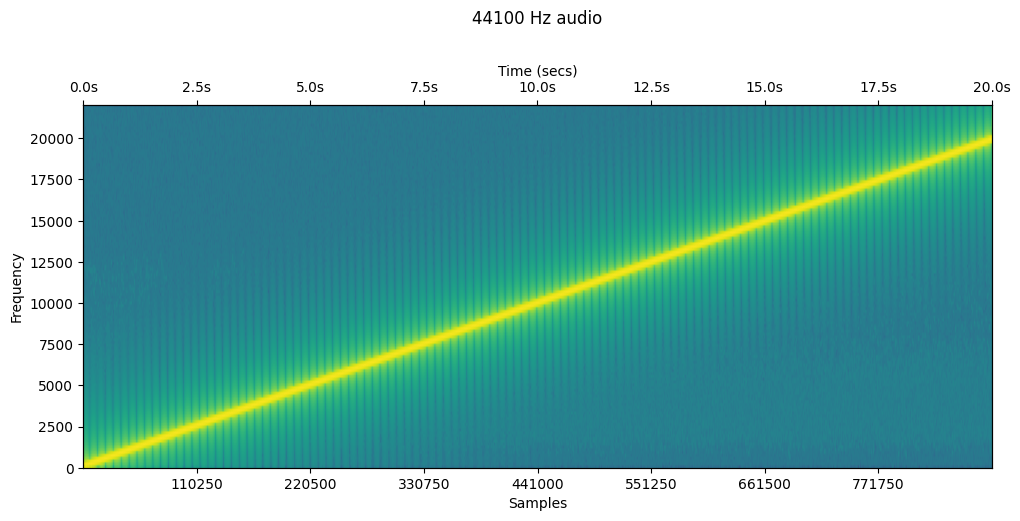

In [17]:
"""
Run this code block to display the original audio
"""

# Import Audio
sampling_rate, freq_sweep_44100 = sp.io.wavfile.read('audio/sweep-linear.wav')

# Plot Spectrogram
scripts.signal.plot_spectrogram(freq_sweep_44100, sampling_rate)

# Display Audio
ipd.Audio(freq_sweep_44100, rate=sampling_rate)

Sampling rate: 44100 Hz with Nyquist limit 22050 Hz
New sampling rate: 11025 Hz with Nyquist limit 2756 Hz


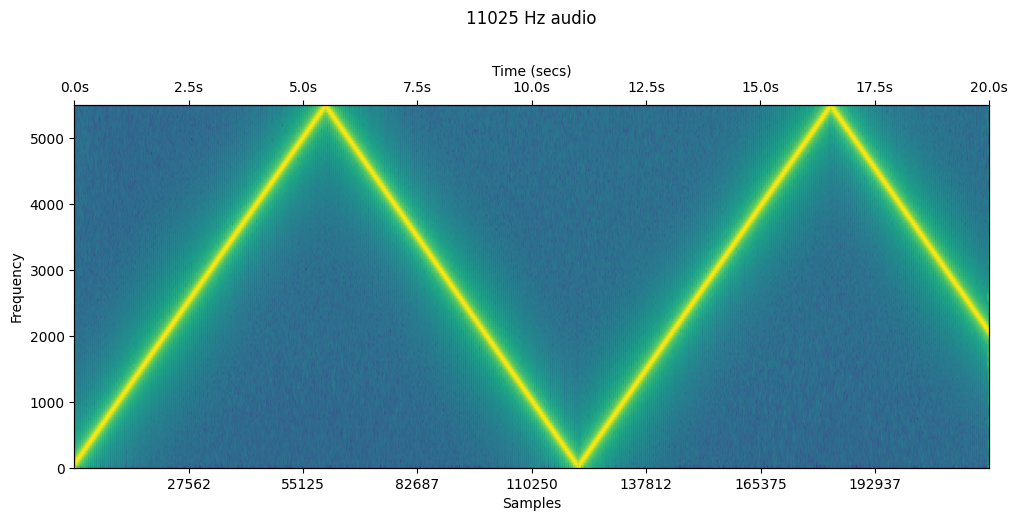

In [16]:
"""
Change the resample factor to sample the frequency sweep at lower sample rates.
"""
# Change this
resample_factor = 4

# Resample Audio
freq_sweep_new, new_sampling_rate = scripts.signal.resample_audio(resample_factor, sampling_rate, freq_sweep_44100)

# Plot Spectrogram
scripts.signal.plot_spectrogram(freq_sweep_new, new_sampling_rate)

# Display Audio
ipd.Audio(freq_sweep_new, rate=new_sampling_rate)

# <a id='1.3-Quantization'>1.3 Quantization</a>


Quantization is the process of converting a continuous range of signal amplitudes into discrete levels, similar to rounding a curve to the nearest horizontal line. This reduces precision but enables digital representation. Unlike sampling, which discretizes the x-axis, quantization discretizes the y-axis. An example is shown in the figure below.

| |
|---|
| <img src="figures/quantization.png" alt="Quantization" width="600"/> |
|*Source: [Tech](https://julie-tech.tistory.com/142)* |
<a id="fig5"><p style="text-align: center;"><b>Figure 3.1: Signal quantization representation of a 3 bit resolution. The continuous signal S(t) is represented with a red colored line while the discrete levels are indicated by the blue line.</b></p></a>

The original analog signal has an infinite range of amplitude values. In quantization, we map these amplitudes to a set number of levels, such as 256 levels for an 8-bit representation ($2^8=256$). Each sample is rounded to the nearest level, introducing some quantization error since the rounded value typically won't match the original exactly.

There are different quantization methods:

**Linear Quantization:** Levels are evenly spaced across the amplitude range.

**Non-linear Quantization:** Levels are unevenly spaced, with more concentrated where the signal often resides, reducing the effect of quantization noise, especially for signals with a wide dynamic range like speech or audio.

## <a id='1.3.1-Quantization-Errors'>Quantization Errors [6 points]</a>

**Q1.3.1:** Calculate the maximum possible quantization error if the signal range is 10V and the resolution is 12 bits? <br>
*Answer:* <br> Quantization levels: $$2^{12} = 4096 \text{ levels}$$
Voltage range per quantization: $$ \text{Step size} = \frac{\text{Voltage range}}{\text{Number of levels}} = \frac{10 \text{ V}}{4096} = 0.00244 \text{ V} $$
<br>

The maximum quantization error is half the step size, since the error is the difference between the original signal and the nearest quantized level.

The maximum quantization error is:

$$ \text{Max Quantization Error} = \frac{0.00244\text{ V}}{2} = 0.00122 \text{ V} $$



**Q1.3.2:** Derive a formula for maximum quantization error given the signal's peak-to-peak voltage range (Vpp) and the number of bits used in quantization (N), given linear quantization? <br>
*Answer:* 
$$V_{pp} = \text{peak-to-peak voltage range of the signal}$$
$$N = \text{number of bits used for the quantization}$$

The number of quantization levels is $$2^{N}$$ and the step size (difference between two different levels) is:
$$\text{Step size} = \frac{V_{pp}}{2^{N}}$$

The formula for the maximum quantization error is:

$$ \text{Max Quantization Error} = \frac{V_{pp}}{2^{N+1}} $$


## <a id='1.3.2-Quantization-Effects'>How does quantization affect audio signals? [6 points]</a>

Use the code block below to answer the upcoming questions. 

*Note:* In the cell below, you can run code to adjust the number of quantization bits for an audio clip. The output will include the new audio clip and two graphs. The first graph shows samples on the x-axis and their values on the y-axis. With many samples, zooming in on the x-axis can help. You can adjust the variable xlim_zoom to see a zoomed-in second graph.

**Q1.3.3:** How does the signal change when you lower the amount of quantization levels? <br>
*Answer:* When lowering the amount of quantization levels, the audio becomes "discontinuous" and not as smooth as with higher amounts of quantization levels, when listening. The overall smoothness of the waveform is reduced. The audio can become more "grainy" or "harsh" sounding, when listening to it, as the finer details of the waveform are lost. 

**Q1.3.4:** Mention a few factors that are relevant when choosing the amount of quantization bits needed for a certain wave? <br>
*Answer:* <br>
*1. Range:* the range of the signal determines how many bits are needed to accurately represent both quiet and loud parts of the signal. For audio, more bits are needed to maintain fidelity in both soft and loud portions of the sound.

*2. Noise Sensitivity:* Signals are sensitive to noise, and therefore benefits from higher quantization levels to minimize the unwanted noise.

*3. Signal-to-noise ratio:* Higher quantization levels yield a higher signal-to-noise ratio (SNR).

*4. Storage and bandwidth:* increasing the number of quantization bits increases the size of the data. When we have limited storage or bandwidth, we can consider using fewer bits and trade off quality for efficiency.

*5. Complexity:* Signals that are very complex with rapid changes require more bits to be able to accuarately represent the signal and not lose information. 

Sampling rate: 44100 Hz
Original 16-bit audio ranges from -32768 to 32767
New 7-bit audio ranges from -64 to 63
Max value: 60 Avg value: 0.05


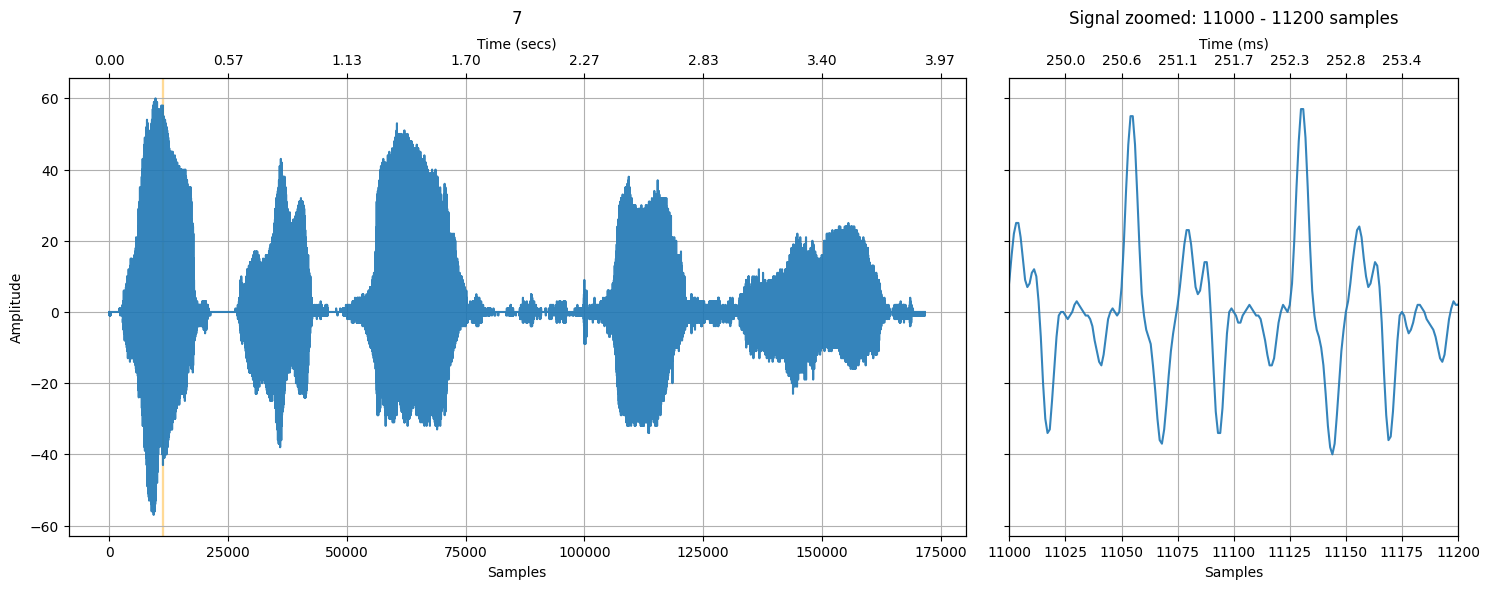

In [7]:
"""
Args:
    input_file (str): Path to the input WAV file.
    output_file (str): Path to the output filtered WAV file.
    quantization_bits (int): Amount of quantization bits.
    original_quantization (int, optional): Amount of quantization bits in the original audio file. Defaults to 16.
"""

# Args (You can use your own audio file if you wish)
input_file = 'audio/run-forrest.wav'
output_file = 'audio/run-forrest-filtered.wav'
quantization_bits = 7 # Change this to change the quantization bits

# Quantize Signal
audio_data, sampling_rate = signal_quantization(input_file, output_file, quantization_bits=quantization_bits)


# Plot quantizaiton graph
xlim_zoom = (11000, 11200) # You may want to change this depending on what audio file you have loaded
scripts.signal.plot_signal(audio_data, sampling_rate, quantization_bits, xlim_zoom = xlim_zoom)


# Import and Display Audio
ipd.Audio(audio_data, rate=sampling_rate)


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# <a id='part2'>Part 2: Digital Signal processing and modulation [60 points]</a>
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In this section, we'll explore digital modulation and wireless symbols, focusing on using schemes like ASK, PSK, FSK, and QAM to transmit information (1's and 0's). We'll also cover IQ plots, constellations, and use Python to simulate transmissions.

## 2.1 Symbols
A symbol represents certain bits of information. The transmitted signal consists of these symbols, allowing us to convey multiple bits per symbol, thus enabling faster data transmission by manipulating wireless signals. This is why both data rate and symbol rate are used to describe communication speeds.

## 2.2 Modulation and Transmitting Bits
Modulation converts data into electrical signals for transmission. For example, binary data can be transmitted over a wire, where high and low voltage levels represent 1's and 0's, with each being a symbol. An alternating symbol signal would look like this:
| |
|---|
| <img src="figures/voltage_levels.png" alt="Voltage Levels" width="800"/> |
<a id="fig1"><p style="text-align: center;"><b>*Figure 2.1:* Electrical signal representing binary information through varying voltage levels. In the given illustration, each symbol has a set duration of 0.1 seconds, which corresponds to a single bit.</b></p></a>
 
Now let's picture that we want to transmit more information per symbol. To transmit more than one bit per symbol, an intuitive approach involves introducing additional levels to represent symbols. For instance, employing a 4-level amplitude modulation enables the transmission of 2 bits per symbol. _Figure 2.2_ shows how this can be done in practice. Note that the data conveyed in the two figures (_Figure 2.1_ and _Figure 2.2_) are not the same.


| |
|---|
| <img src="figures/4_level_shift_keying.png" alt="Several Voltage Levels" width="800"/> |
<a id="fig1"><p style="text-align: center;"><b>*Figure 2.2:* 4-level amplitude modulation scheme. This modulation scheme enables the transmission of 2 bits per symbol with a symbol duration of 0.1 seconds. This illustrates the concept of conveying multiple bits within a single symbol.</b></p></a>



## <a id='2.2-Shift keying questions'>2.2 Questions [12 Points]</a>

Note: Symbol duration is 0.1s

**Q2.2.1:** How many bits per second are transmitted in Figure 2.2?  <br>
*Answer:* 10 symbols/second * 2 bits/symbol = 20 bits/second 

**Q2.2.2:** What throughput can be achieved with 16 different amplitude levels and 8 ns symbols?  <br>
*Answer:* 16 different amplitude levels equals 4 bits/symbol. If one symbol duration equals 8 nanoseconds, the throughout equals:
    (8 * 10^-9 [sek/symbol])^-1 * 4[bits/symbol] = 500 Mbits/second 

**Q2.2.3:** Can you think of a general formula of how to calculate bits per symbol based on the amount of symbols used? <br>
*Answer:*  [bits/sec] = transmisson rate [symbol/sec] * log2(number of symbols used) [bits/symbol]

**Q2.2.4:** When calculating the respective throughputs we have neglected an important phenomenon that would occur in real life. What important real life factor is left out in the calculations above?  <br>
*Answer:* Real world disturbances have been ignored in the calculations above. Especially channel noise or other disturbances that can destort the signal has not been taken into consideration. The higher the symbols becomes, the better the transmisson medium has to be to ensure efficent and error-free transmisson. In other words, the SNR needs to be high. Noise can temper with the signal so that a 0111 signaled is recieved as an 0110. Not the same!




## 2.3 Wireless Symbols and Modulation
Now that we know how to send symbols over a wired medium, let's explore transmitting data wirelessly using radio waves. The principles of modulation are similar for both wired and wireless transmission, but we can't directly send the wired signal for two reasons:

1. **Low frequencies:** Signals below 300 kHz need impractically large antennas for transmission.
2. **Square waves:** These waves are inefficient as they consume too much bandwidth.

To transmit wirelessly, we use a "carrier wave," a continuous wave that carries no information on its own. We modify it, like how we adjusted voltage levels for wired transmission, to convey data.

How do we modify the carrier wave? We alter the sinusoidal carrier wave's parameters:
1. Amplitude, $A$
2. Frequency, $f$
3. Phase, $\phi$

By adjusting these, we modulate data onto the carrier wave, creating a wireless signal.


## 2.4 Amplitude Shift Keying (ASK)
Amplitude Shift Keying (ASK) is a simple digital modulation scheme where the amplitude of the carrier wave is varied to represent data. In ASK, a fixed-amplitude carrier wave at a fixed frequency is transmitted for a specific time to represent a symbol. For instance, in a 2-ASK system, the carrier is transmitted at one amplitude for a 1 and a reduced amplitude for a 0. Since only two amplitude levels are used, this is called 2-ASK. An example of 2-ASK is shown below:


| |
|---|
| <img src="https://pysdr.org/_images/ASK.svg" alt="2-ASK example" width="800"/> |
|*Source: https://pysdr.org/* |
<a id="fig1"><p style="text-align: center;"><b>*Figure 2.3:* An electrical signal and its corresponding translation into a 2-ASK scheme.</b></p></a>


But how do we create this signal digitally? Through code, we generate a vector with _N_ samples per symbol, then multiply that vector by a sinusoid. This modulates the signal onto a carrier wave (the sinusoid). The example below demonstrates 2-ASK with 10 samples per symbol:



| |
|---|
| <img src="https://pysdr.org/_images/ask3.svg" alt="Sampliong for 2-ASK" width="800"/> |
|*Source: https://pysdr.org/* |
<a id="fig1"><p style="text-align: center;"><b>*Figure 2.4:* Representation of sampling for the 2-ASK signal.</b></p></a>
---

## 2.4 Coding Task: Generating an ASK Signal [12 points]
Let's create our own ASK signal. We have provided default parameters for configuring the signal and a function that generates a binary stream of data (symbols). Your task is to create a 2-ASK signal by mixing the carrier with the symbols: when a 0 occurs, the sinusoid should have an amplitude of 0, and when a 1 occurs, the amplitude should be 1.

**NB!:** Remember to input your student number as the seed and run both code blocks to generate a random set of symbols.


In [8]:
# Carrier wave and binary waveform configuration parameters
sample_rate = 1000 # (Hz)
symbol_duration = 0.1 # (sec)
carrier_frequency = 30 # (Hz)
simulation_time = 1 # (sec)
t = np.arange(0, simulation_time, 1/sample_rate)
carrier_signal = np.sin(2*pi*carrier_frequency*t)   # signal = A * sin(2πft + φ)

# Create binary stream of data
num_of_samples = sample_rate*symbol_duration
num_of_symbols =  int(np.floor(np.size(t)/num_of_samples))
symbols = gen_binary_array(num_of_symbols, num_of_samples, seed)

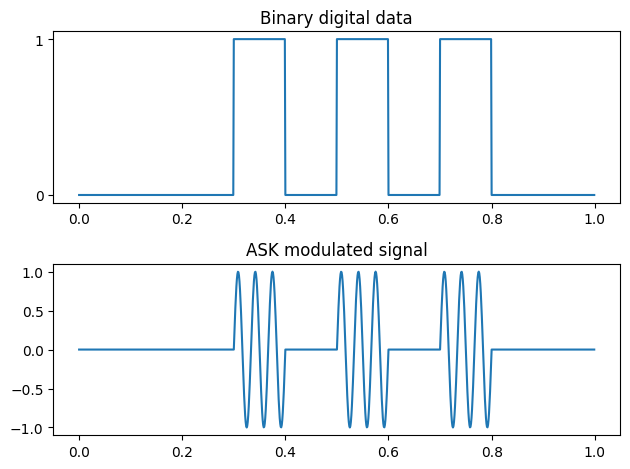

In [12]:
# Code for ASK

# ASK waveform generation
# Modulate the generated symbol on to the carrier signal. Your signal should resemble the one shown in the picture above. 
# Before starting, remember to run the code block above. This will generate a stream of data - symbols to transmit.

ask_signal = carrier_signal * symbols #TODO: write code here 

# Binary waveform and ASK waveform Plots
figure, axis = plt.subplots(2)
# Set y-axis labels to '0' and '1'
axis[0].set_yticks([0, 1])
axis[0].set_yticklabels(['0', '1'])
axis[0].plot(t,symbols)
axis[0].set_title("Binary digital data")
axis[1].plot(t, ask_signal)
axis[1].set_title("ASK modulated signal")
plt.tight_layout()
plt.show()


## 2.5 Frequency Shift Keying (FSK)
Next, let's explore Frequency Shift Keying (FSK). Similar to ASK, but instead of adjusting the amplitude, we adjust the frequency. We shift between _N_ frequencies, each representing a symbol. Since we are modulating a carrier, we shift the carrier frequency by +/- these _N_ values to derive the frequencies.

For example, a 4-FSK signal in the frequency domain might look like this:

| |
|---|
| <img src="https://pysdr.org/_images/fsk.svg" alt="4-FSK spectral density" width="800"/> |
|*Source: https://pysdr.org/* |
<a id="fig1"><p style="text-align: center;"><b>*Figure 2.5:* Power spectral density map of a 4-FSK signal.</b></p></a>


The figure above is a power spectral density map, showing how the power of a signal is distributed across different frequencies. The x-axis represents frequency, and the y-axis represents power density. Each peak corresponds to a specific frequency, with 4 peaks indicating a 4-FSK scheme. Variations in the rest of the spectrum represent "noise," which is electromagnetic interference from external sources.


## <a id='2.5-ASK task'>2.5 Coding Task: Generating a FSK signal [12 points]</a>

Your task now is to generate a 2-FSK signal. Fill out the code below to generate a 2-FSK signal from the same binary stream of data. 

Start with creating a function for the frequency, mixing the binary stream of data with the carrier frequency. Then, use this to generate a sinusoid. Remember that this creates a representation of changes in the signal, and not a power spectral density. Your figure will not resemble the figure used above.


**Want a hint?**
1. Create a variable representing the different frequencies: 
    - Whenever transmitting 1's the frequency of the signal should double the carrier frequency.
    - Whenever transmitting 0's the frequency of the signal should be the same as the carrier frequency. <br><br>
2. Take the binary stream of data we generated for 2-ASK earlier. Now, instead of modulating it with amplitude like before, we want to modulate it differently. Mix this data stream with the carrier frrequency to get a 2-FSK signal.



In [18]:
# Carrier wave and binary waveform configuration parameters
sample_rate = 1000 # (Hz)
symbol_duration = 0.1 # (sec)
carrier_frequency = 30 # (Hz)
simulation_time = 1 # (sec)
t = np.arange(0, simulation_time, 1/sample_rate)
carrier_signal = np.sin(2*pi*carrier_frequency*t) 
double_frequency_carrier_signal = np.sin(4*pi*carrier_frequency*t)# signal = A * sin(2πft + φ)

# Create binary stream of data
num_of_samples = sample_rate*symbol_duration
num_of_symbols =  int(np.floor(np.size(t)/num_of_samples))
symbols = gen_binary_array(num_of_symbols, num_of_samples, seed)

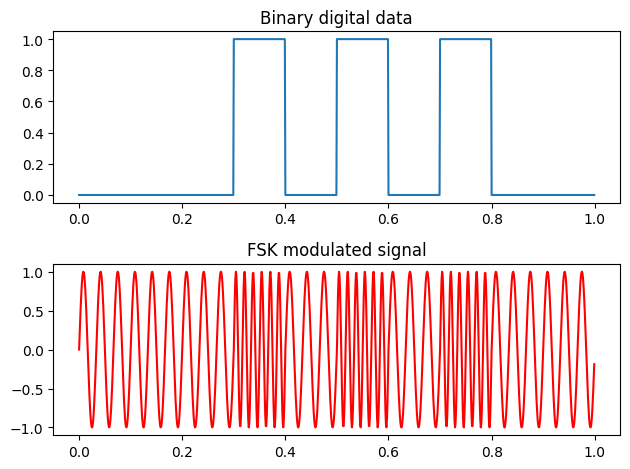

In [19]:
# FSK task
fsk_signal = double_frequency_carrier_signal * symbols + carrier_signal * (1 - symbols) #TODO: write code here 

# Binary waveform and FSK modulation waveform Plots
figure, axis = plt.subplots(2)
axis[0].plot(t, symbols)
axis[0].set_title("Binary digital data")
axis[1].plot(t, fsk_signal, 'r')
axis[1].set_title("FSK modulated signal")
plt.tight_layout()
plt.show()

# 2.6 Phase Shift Keying (PSK)
Now let’s consider modulating the phase. We do this in a similar manner as we did with the amplitude. Again, we start with the simplest form is Binary PSK, a.k.a. BPSK. BPSK shifts the phase of the signal between two levels of phase:

1. $\phi = 0$, leading to no phase shift of the carrier.
2. $\phi = \pi$ leading to a 180 degree phase shift of the carrier.

Below you can see an example of a BPSK scheme. Notice how the changes going from one type of symbol to another correspond to the phase shifts:

| |
|---|
| <img src="figures/bpsk_signal.png" alt="BPSK signal" width="500"/> |
|*Source: [Nikola Jovanovic, MathWorks](https://www.mathworks.com/matlabcentral/fileexchange/79224-bpsk-system-modeled-and-benchmarked-against-ber-snr)* |
<a id="fig1"><p style="text-align: center;"><b>*Figure 2.6:* Phase shifts in a BPSK signal.</b></p></a>



## <a id='2.6-PSK task'>2.6 Coding Task: Generating a PSK signal [12 points]</a>
Generate a PSK signal. This time, mix the symbols with the phase in such a way that it aligns with the description of BPSK above. That is:
- Whenever transmitting 1's the signal wave should have no shift in phase. 
- Whenever transmitting 0's the signal wave should have a phase shift of 180 degrees.

Start by creating a formula for representing the phase. Then, use this as a variable when creating the BPSK-signal.

In [23]:
# Carrier wave and binary waveform configuration parameters
sample_rate = 1000 # (Hz)
symbol_duration = 0.1 # (sec)
carrier_frequency = 30 # (Hz)
simulation_time = 1 # (sec)
t = np.arange(0, simulation_time, 1/sample_rate)

# Her la jeg til et nytt signal *shifted_carrier_signal* som er identisk med carrier_signal, bortsett fra at the har et faseskift på 180 grader.
carrier_signal = np.sin(2*pi*carrier_frequency*t)   # signal = A * sin(2πft + φ)
shifted_carrier_signal = np.sin(2*pi*carrier_frequency*t + np.pi)

# Create binary stream of data
num_of_samples = sample_rate*symbol_duration
num_of_symbols =  int(np.floor(np.size(t)/num_of_samples))
symbols = gen_binary_array(num_of_symbols, num_of_samples, seed)

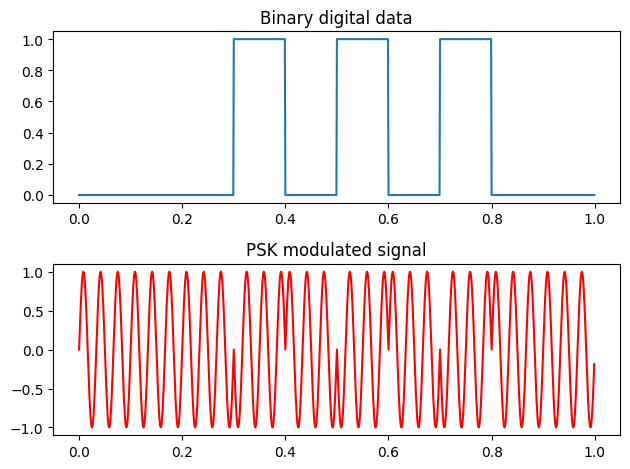

In [24]:
# PSK waveform generation
phase = 0 #TODO: write code here
bpsk_signal = shifted_carrier_signal * symbols + carrier_signal * (1 - symbols) # Bytter mellom signalene carrier_signal og shifted_carrier_signal ut fra verdien på symbols

# Binary waveform and PSK modulation waveform Plots
figure, axis = plt.subplots(2)
axis[0].plot(t, symbols)
axis[0].set_title("Binary digital data")
axis[1].plot(t, bpsk_signal, 'r')
axis[1].set_title("PSK modulated signal")
plt.tight_layout()
plt.show()

## 2.7 IQ-plots, constellation diagrams and QAM
Plotting a PSK signal like we did in Part 2.6 can give us an intitutive way of visualizing the phase shifts, but it can be hard to interpret such plots, especially when we use a higher level PSK modulation scheme (i.e., more than just two phase shifts). Because of this, we usually represent the phase in the complex plane, using what is called a *IQ-plot*. In a IQ-plot, each point represents a unique symbol, based on amplitude and phase. We then plot the respective symbols on a complex plane. Remember that the phase of a symbol can be  measured relative to a reference angle (typically 0° relative to carrier signal). A modulation scheme that alters the phase, like Binary Phase Shift Keying (BPSK), could therefore be mapped on to a complex plane, as seen in Figure 2.7.1.

| |
|---|
| <img src="https://pysdr.org/_images/bpsk_iq.png" alt="BPSK on an IQ-plot" width="300"/> |
|*Source: https://pysdr.org/* |
<a id="fig1"><p style="text-align: center;"><b>*Figure 2.7:* BPSK scheme mapped to a complex plane.</b></p></a>


When we show the set of possible symbols for a given modulation scheme, we call it the “constellation”. Many modulation schemes can be defined by their constellation. Modulation schemes with greater numbers of constellation points are able to transmit more information per symbol, as the more symbols there are in a given modulation scheme, the greater number of bits a single symbol can represent. 

For PSK we always have N different phases. We space them evenly around for best results. When mapping PSK schemes, we often show the unit circle to emphasize that all points have the same magnitude (amplitude). Take for example the modulation scheme QPSK, which has 4 levels of phase. In QPSK, the constellation diagram would consist of four equally spaced points around the unit circle in the complex plane. Each point represents a unique symbol, and the distance between adjacent points corresponds to a phase shift of 90°. The four symbols could correspond to bit patterns like 00, 01, 10, and 11. In 8-PSK, there would be eight equally spaced points, each corresponding to a phase shift of 45°. 

| |
|---|
| <img src="https://pysdr.org/_images/psk_set.png" alt="BPSK, QPSK and 8-PSK" width="500"/> |
|*Source: https://pysdr.org/* |
<a id="fig1"><p style="text-align: center;"><b>*Figure 2.8:* BPSK scheme mapped to a complex plane.</b></p></a>


Theoretically QPSK can transmit twice as much data using the same amount of bandwidth as BPSK, and 8-PSK could transmit twice as much data using the same amount of bandwidth as QPSK. Another way of phrasing it is that QPSK could transmit the same amount of data using half the bandwidth as BPSK. The tradeoff, however, is that there is less tolerance in the system for error. To illustrate this, consider that BPSK utilizes only two constellation points, effectively dividing the entire I/Q plane into two sections with the decision boundary positioned along the Q-axis. Consequently, a received I/Q value could deviate by 89° in phase, yet the intended symbol could still be accurately interpreted since it falls within the correct decision boundary (as depicted in Fig. 5). However, in QPSK, the I/Q plane is divided into four sections, with decision boundaries present along both the I- and Q-axes, allowing less room for error. Therefore, in QPSK, a symbol received with a phase deviation of 89° would be misinterpreted by the receiver, resulting in a symbol error.

| |
|---|
| <img src="figures/BPSK_vs_QPSK.png" alt="Margins of error" width="500"/> |
|*Source: [NuWaves Engineering](https://nuwaves.com/wp-content/uploads/AN-005-Constellation-Diagrams-and-How-They-Are-Used1.pdf)* |
<a id="fig1"><p style="text-align: center;"><b>*Figure 2.9:* Comparing symbol errors .</b></p></a>

A modulation scheme that alters both the amplitude and phase is called Quadrature Amplitude Modulation (QAM). This makes QAM signal able to transmit more information per symbol. In QAM, the constellation diagram represents both amplitude and phase information. The points in the constellation are typically arranged in a rectangular grid pattern, with signal points located at various combinations of amplitude and phase. For example, in 16-QAM, there are 16 signal points arranged in a 4x4 grid. Each point in the grid represents a unique combination of both amplitude and phase, allowing for the transmission of four bits per symbol.

| |
|---|
| <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/16QAM_Gray_Coded.svg/1942px-16QAM_Gray_Coded.svg.png" alt="16QAM" width="300"/> |
|*Source: https://wikipedia.org/* |
<a id="fig1"><p style="text-align: center;"><b>*Figure 2.10:* 16-QAM Constellation diagram.</b></p></a>


By adjusting both the amplitude and phase of the signal, QAM modulation schemes can achieve higher data rates and spectral efficiency compared to simpler modulation schemes like PSK or ASK. However, QAM schemes are also more susceptible to noise and interference due to the increased complexity of decoding the received signal.

## <a id='2.7-IQ-plot questions'>2.7 Questions [12 points]</a>

**Q2.7.1:** Given one specific scheme, do all points on a constellation diagram have to be equally spaced? Why or why not? <br>
*Answer:* Given a specific scheme the points should be equally spaced as to distribute the error equally among the points, however despite non-equal spacing being strictly worse it is possible to do. Whenever a specific scheme is provided (for example 256-QAM) one should assume that the points on the constellation are equally distributed. 

**Q2.7.2:** Explain how noise and interference impact the distribution of constellation points in modulation scheme. How does this affect the receiver's ability to correctly demodulate the received signal?<br>
*Answer:* Noise and interference can displace a received signal along the constellation such that the signal is misinterpreted at Rx as a different symbol than what was transfered at Tx.

**Q2.7.3:** Discuss the trade-offs involved in selecting a higher order QAM scheme, such as 256-QAM or 64-QAM, compared to lower order schemes like QPSK or 8-PSK. Consider factors such as sensitivity to noise and spectral efficiency. <br>
*Answer:* 
Higher order QAM modulation schemes are much more spectrally efficient than lower order ones, however higher order QAM modulation schemes are also much more susceptible to noise than lower order QAM modulation schemes. This is because the euclidean distance between the points on the constellation is diminished, which leads to a lesser noise amplitude being necessary in order to shift a signal to another point on the modulation scheme.
